## Auxiliary Functions

In [1]:
def udc_mapping(code):
    if code >= 0 and code < 99:
        return "General"
    elif code >=100 and code <199:
        return "Philosophy. Psychology"
    elif code >=200 and code <299:
        return "Religion. Theology"
    elif code >=300 and code <399:
        return "Social Sciences"
    elif code >=400 and code <499:
        return "Vacant"
    elif code >=500 and code <599:
        return "Mathematics. Natural Sciences"
    elif code >=600 and code <699:
        return "Applied Sciences. Medicine, Technology"
    elif code >=700 and code <799:
        return "The Arts. Entertainment. Sport"
    elif code >=800 and code <899:
        return "Linguistics. Literature"
    elif code >=900 and code <999:
        return "Geography. History"

# Import Libraries

In [2]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import calendar

# Load Data
* The data is extracted directly from the GitHub repository.
* The different tables are concatenated into a single dataframe.

In [3]:
url='https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/tree/main/Dia_1-Importando_dados/Datasets/dados_emprestimos?raw=true'
with requests.Session() as req:
        r = req.get(url)
        soup = bs(r.content, 'html.parser')
        target = [f"{url[:18]}{item['href']}" for item in soup.select(
            "a[href$='.csv']")]

seen = set()
all_files = []
for item in target:
    if item not in seen:
        seen.add(item)
        all_files.append(item)
 
df=pd.DataFrame()

for x in all_files:
    path= x +'?raw=true'
    df_aux=pd.read_csv(path)
    df=pd.concat([df,df_aux],ignore_index=True)
             


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


In [5]:
df_books = pd.read_parquet('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet')
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546237 entries, 0 to 568584
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id_exemplar       546237 non-null  int64 
 1   codigo_barras     546237 non-null  object
 2   colecao           546237 non-null  object
 3   biblioteca        546237 non-null  object
 4   status_material   546237 non-null  object
 5   localizacao       546237 non-null  int64 
 6   registro_sistema  546237 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 33.3+ MB


# Data Preprocessing

Drop unused columns.

In [6]:
df_books=df_books.drop('registro_sistema',axis=1)

Removing duplicates.

In [7]:
print("Number of Duplicates of First DF: ",df.duplicated().sum())

df_clean=df.drop_duplicates();

print("Number of Duplicates of Second DF: ",df_books.duplicated().sum())

df_books_clean=df_books.drop_duplicates();

Number of Duplicates of First DF:  0
Number of Duplicates of Second DF:  0


Data type conversion.

In [8]:
matricula_ou_siape_str = df_clean['matricula_ou_siape'].astype('string').to_frame()
df_clean=df_clean.drop('matricula_ou_siape',axis=1)
df_clean.insert(5, 'matricula_ou_siape', matricula_ou_siape_str)


KeyError: 'matricula_ou_siape'

To improve the readability of the “localizacao” column, the universal decimal classification (UDC) will be used. Therefore, a UDC column will be added to the original dataframe, mapping the values of the “localizacao” column.

The mapping will follow the main classes shown in the table below.

| **Notation** | **Description**                                                                                                                      |
|--------------|--------------------------------------------------------------------------------------------------------------------------------------|
| 000 to 099   | Science and Knowledge. Organization. Computer Science. Information Science. Documentation. Librarianship. Institutions. Publications |
| 100 to 199   | Philosophy. Psychology                                                                                                               |
| 200 to 299   | Religion. Theology                                                                                                                   |
| 300 to 399   | Social Sciences                                                                                                                      |
| 400 to 499   | vacant                                                                                                                               |
| 500 to 599   | Mathematics. Natural Sciences                                                                                                        |
| 600 to 699   | Applied Sciences. Medicine, Technology                                                                                               |
| 700 to 799   | The Arts. Entertainment. Sport                                                                                                       |
| 800 to 899   | Linguistics. Literature                                                                                                              |
| 900 to 999   | Geography. History                                                                                                                   |

First, it's necessary to check that all the values are within the range in the table.

In [ ]:
print("Out of Range Values: ",len(df_books_clean.query("localizacao<0 or localizacao>999")))

Out of Range Values:  0


In [ ]:
df_books_clean['udc']=list(map(udc_mapping,df_books_clean['localizacao']))

Convert columns to datetime

In [ ]:
df_clean['data_emprestimo']=pd.to_datetime(df_clean['data_emprestimo'])
df_clean['data_devolucao']=pd.to_datetime(df_clean['data_devolucao'])
df_clean['data_renovacao']=pd.to_datetime(df_clean['data_renovacao'])

In [ ]:
df_clean.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692,200721119.0,ALUNO DE GRADUAÇÃO
8,709688,2007027500,2010-01-19 15:59:26.464,2010-01-04 08:27:33.569,2010-02-03 13:06:30.662,2009045971.0,ALUNO DE GRADUAÇÃO


## Exploratory Data Analysis

### Loans per Year

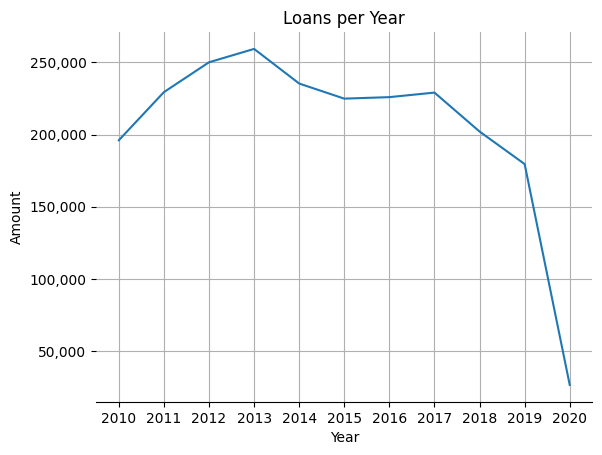

In [ ]:
df_clean['year']=df_clean['data_emprestimo'].dt.strftime('%Y')
loans_per_year=df_clean['year'].value_counts().sort_index()

fig, ax = plt.subplots()

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")

ax.set_xlabel("Year")
ax.set_ylabel("Amount")

ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))


ax.plot(loans_per_year.index, loans_per_year.values)

plt.title("Loans per Year")

plt.grid()

plt.show()


Loan numbers increased until 2013. From 2013 to 2015, there was a significant decline. The period from 2015 to 2017 experienced relative stability, followed by a steep decrease until 2020.

### Distribution of Loans per Month

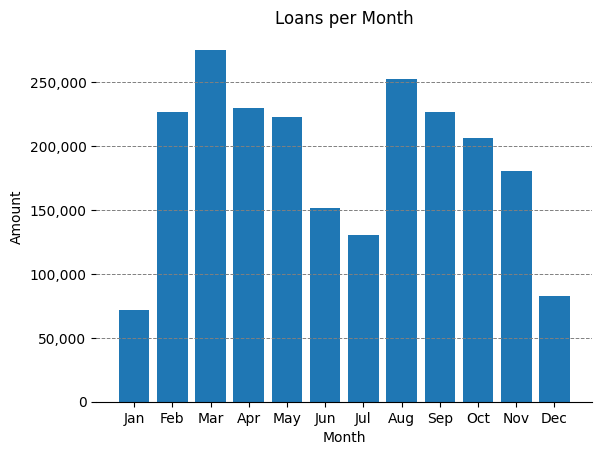

In [ ]:
month_abbr_order = list(calendar.month_abbr)[1:]
d = dict(enumerate(calendar.month_abbr))
month_abbr = {str(key): value for key, value in d.items()}
loans_per_month=df_clean['data_emprestimo'].dt.strftime('%m').str.lstrip('0').map(month_abbr).value_counts()
loans_per_month = loans_per_month.reindex(sorted(loans_per_month.index, key=lambda x: month_abbr_order.index(x)))

fig, ax = plt.subplots()

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")

ax.set_xlabel("Month")
ax.set_ylabel("Amount")

ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))


ax.bar(loans_per_month.index, loans_per_month.values)

plt.title("Loans per Month")

plt.grid(which='both', axis='y', color='gray', linestyle='--', linewidth=0.7)

plt.show()

* The months with the highest number of loans are March and August (beginning of the semester). 
* January and December have the lowest number of loans (vacation period). 
* From February to May there is the period with the most transactions.

### Distribution of Loans per Timeslot

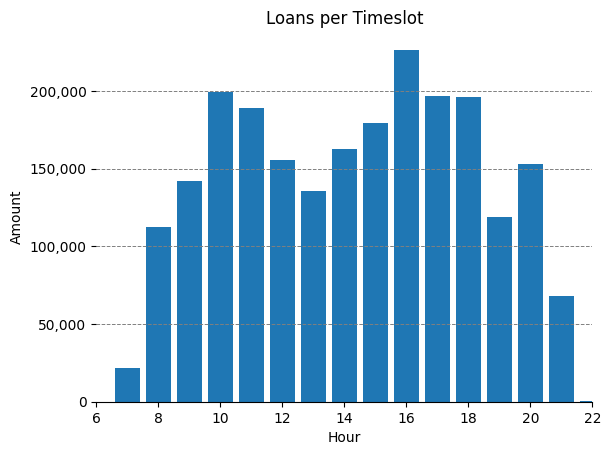

In [ ]:
loans_per_timeslot=df_clean['data_emprestimo'].dt.hour.value_counts().sort_index()
fig, ax = plt.subplots()

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")

ax.set_xlabel("Hour")
ax.set_ylabel("Amount")

ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))


ax.bar(loans_per_timeslot.index, loans_per_timeslot.values)

plt.title("Loans per Timeslot")

plt.xlim(6, 22)

plt.grid(which='both', axis='y', color='gray', linestyle='--', linewidth=0.7)

plt.show()

* Most loans are typically initiated during the afternoon.
* The number of loans increases until 10 a.m. and then decreases until 12 p.m., increasing again until 16 p.m. 
* The minimums occur near the opening and closing of the library.